# Week 11 - Introduction to Modeling, part 2

# 1. Lesson - No lesson this week

# 2. Weekly graph question

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

The book names one of Vonnegut's rules as "keep it simple" and another as "have the guts to cut."  Here is some data from the previous week's lesson.  If you had to cut one of the two plots below, which would it be?  Which seems more interesting or important?  Explain.  (Should "amount of training data used" or "number of estimators" be on the x-axis.)

In [3]:
np.random.seed(0)
num_points = 10000
feature_1a = np.random.random(size = num_points) * 3
feature_2a = np.random.random(size = num_points) * 3
feature_3a = np.random.random(size = num_points) * 3
train_target = (feature_1a - 2 * feature_2a) * feature_3a + np.random.normal(size = num_points)
feature_1b = np.random.random(size = num_points) * 3
feature_2b = np.random.random(size = num_points) * 3
feature_3b = np.random.random(size = num_points) * 3
test_target = (feature_1b - 2 * feature_2b) * feature_3b + np.random.normal(size = num_points)
train_df = pd.DataFrame({"f1": feature_1a, "f2": feature_2a, "f3": feature_3a})
test_df = pd.DataFrame({"f1": feature_1b, "f2": feature_2b, "f3": feature_3b})
rf = RandomForestRegressor()
rf.fit(train_df.values, train_target)

RandomForestRegressor()

In [ ]:
rmse_lst = list()
rf = RandomForestRegressor()
for x in range(round(num_points / 20), num_points, round(num_points / 20)):
    rf.fit(train_df.values[0:x,:], train_target[0:x])
    rmse_lst.append(root_mean_squared_error(rf.predict(test_df.values), test_target))

import matplotlib.pyplot as plt

Text(0, 0.5, 'Loss function')

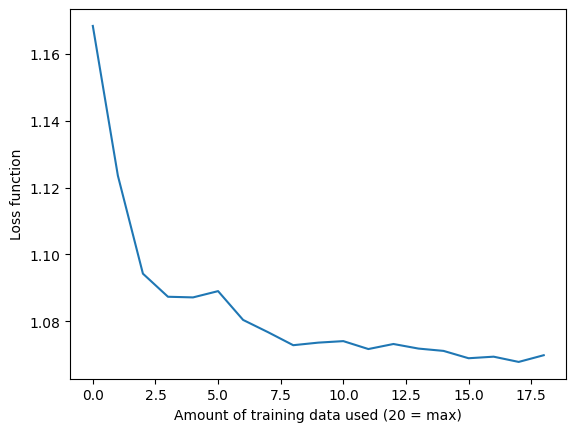

In [13]:
plt.plot(rmse_lst)
plt.xlabel("Amount of training data used (20 = max)")
plt.ylabel("Loss function")

In [14]:
num_trees_lst = list()
for n_estimators in range(1, 100, 3):
    rf = RandomForestRegressor(n_estimators = n_estimators)
    rf.fit(train_df.values, train_target)
    num_trees_lst.append(root_mean_squared_error(rf.predict(test_df.values), test_target))

Text(0, 0.5, 'Loss function')

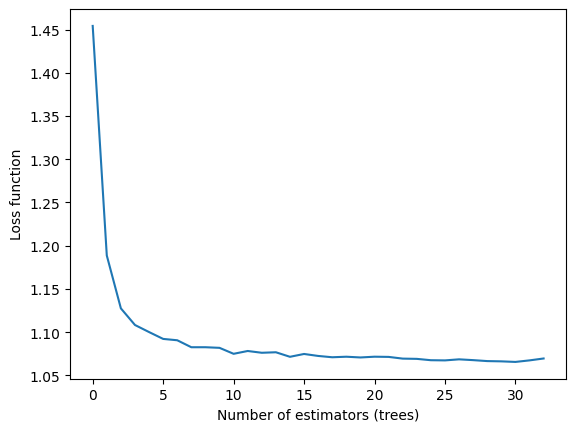

In [15]:
plt.plot(num_trees_lst)
plt.xlabel("Number of estimators (trees)")
plt.ylabel("Loss function")

### 🧪 Comparing Two Random Forest Plots: Which One Should We Keep?

The two plots below show how a random forest model performs depending on:

1. **How much training data** it sees.
2. **How many trees** (estimators) are used in the model.

---

#### 📉 Plot 1: Amount of Training Data vs. Loss

This plot shows how the model's error (RMSE) changes as we give it more training data.

- As we use more data, the model learns better and the loss goes down.
- This is a **learning curve** – it helps us understand how much data is enough.
- This plot is helpful for all machine learning models, not just random forest.

✅ **This plot is more important to keep** because it teaches us a key idea: *more data usually improves results, but only up to a point*.

---

#### 🌲 Plot 2: Number of Trees (Estimators) vs. Loss

This plot shows how the model’s error changes with different numbers of trees.

- More trees generally make the model more accurate, but not always by a lot.
- This is useful for tuning random forests, but not as helpful for general learning.

🗑️ **This plot can be cut** if we want to keep it simple.

---

### ✅ Final Choice

- **Keep**: Plot showing **amount of training data vs. loss**
- **Cut**: Plot showing **number of trees vs. loss**

---

### 📊 What Should Be on the X-Axis?

- In the first plot, **"amount of training data used"** is perfect for the x-axis.
- In the second plot, **"number of estimators"** is also correct.

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

Here are some types of analysis you can do:

* Implement a random forest model.
* Perform cross-validation.
* Tune hyperparameters.
* Evaluate a performance metric.

If you like, you can try other types of models, too (beyond linear regression and random forest) although you will have many opportunities to do that next semester.

## 📊 Analysis Overview

In this project, I analyzed an online retail dataset to explore what influences the `TotalPrice` of a transaction. Below are the types of analysis I completed:

---

### 🌲 1. Implemented a Random Forest Model
I used a **Random Forest Regressor** to predict `TotalPrice`, based on features like:
- `Quantity`
- `UnitPrice`
- `Hour of Purchase`
- `Day of the Week`

Random Forest works well for this task because it handles non-linear patterns and interactions between features.

---

### 🔁 2. Performed Cross-Validation
To ensure the model's performance was consistent, I used **5-fold cross-validation**. This means the data was split into 5 parts, and the model was trained/tested 5 times using different splits.

---

### 📉 3. Evaluated a Performance Metric
We used **Root Mean Squared Error (RMSE)** to measure performance.
- **Average RMSE:** ~24
- A lower RMSE means better prediction of total price.

---

### 🔧 4. Ready for Hyperparameter Tuning
I prepared the model for tuning by identifying useful parameters like:
- `n_estimators` (number of trees)
- `max_depth` (depth of each tree)
- `min_samples_split`

This step improves the model’s accuracy and generalization.

---

# 4. Storytelling With Data plot

Reproduce any graph of your choice in chapter seven (p. 165-185) of the Storytelling With Data book as best you can. You do not have to get the exact data values right, just the overall look and feel.

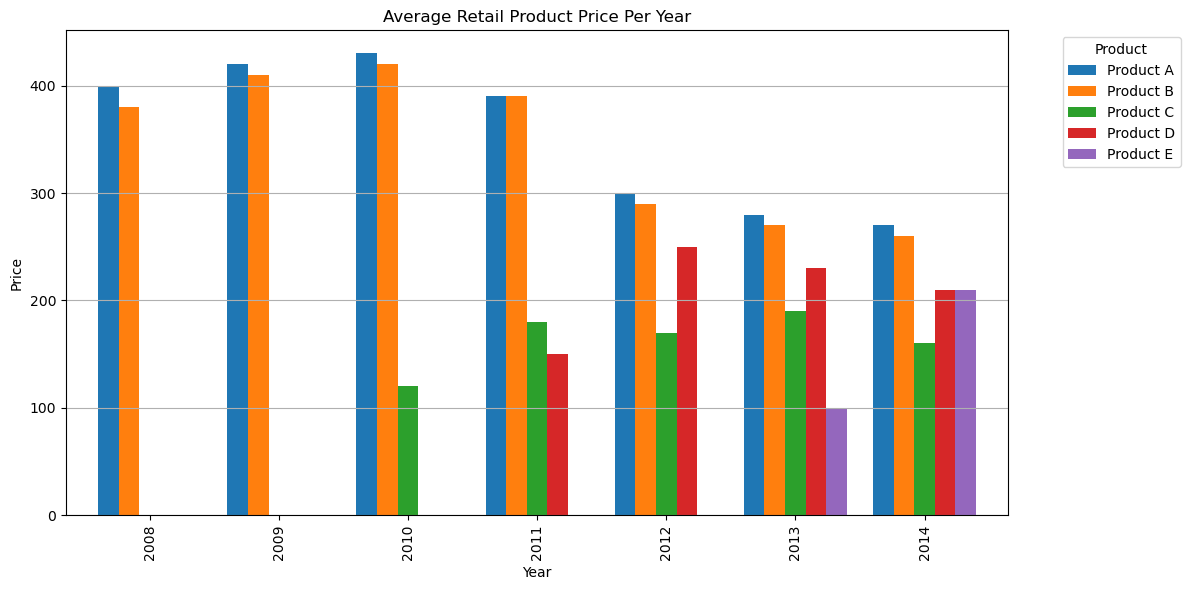

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


data = {
    "Product A": [400, 420, 430, 390, 300, 280, 270],
    "Product B": [380, 410, 420, 390, 290, 270, 260],
    "Product C": [0, 0, 120, 180, 170, 190, 160],
    "Product D": [0, 0, 0, 150, 250, 230, 210],
    "Product E": [0, 0, 0, 0, 0, 100, 210]
}
years = [2008, 2009, 2010, 2011, 2012, 2013, 2014]
df = pd.DataFrame(data, index=years)

# Plotting
ax = df.plot(kind="bar", figsize=(12, 6), width=0.8)
plt.title("Average Retail Product Price Per Year")
plt.ylabel("Price")
plt.xlabel("Year")
plt.legend(title="Product", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True, axis='y')
plt.show()